In [38]:
import matplotlib.pyplot as plot
import numpy as np
import pandas


Matplotlib is building the font cache; this may take a moment.


In [39]:
colums_to_read = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population', 'people_fully_vaccinated', 'median_age','aged_65_older', 'cardiovasc_death_rate', 'diabetes_prevalence']

dataset = pandas.read_csv('owid-covid-data_top10.csv', sep=',', encoding='utf-8', usecols=colums_to_read)

dataset['year_month'] = dataset['date'].str[0:7]
dataset['year_month']

0       2020-02
1       2020-02
2       2020-02
3       2020-02
4       2020-03
         ...   
7658    2022-03
7659    2022-03
7660    2022-03
7661    2022-03
7662    2022-03
Name: year_month, Length: 7663, dtype: object

In [40]:
covid_by_month = dataset.groupby(
   by= ['location', 'year_month'],
   as_index=False
).agg(
        total_cases = ('total_cases', 'max'),
        new_cases = ('new_cases', 'sum'),
        total_deaths = ('total_deaths', 'max'),
        new_deaths = ('new_deaths', 'sum'),
        population = ('population', 'mean'),
        people_fully_vaccinated = ('people_fully_vaccinated', 'max'),
        median_age = ('median_age', 'max'),
        aged_65_older = ('aged_65_older', 'mean'),
        cardiovasc_death_rate = ('cardiovasc_death_rate', 'mean'),
        diabetes_prevalence = ('diabetes_prevalence', 'max')
)


In [41]:
pandas.set_option('display.max_rows', 300)
covid_by_month.fillna(0, inplace=True)
covid_by_month

,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
5,Brazil,2020-07,2670451.0,1257782.0,92728.0,32936.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
6,Brazil,2020-08,3914829.0,1244378.0,121618.0,28890.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
7,Brazil,2020-09,4817365.0,902536.0,144078.0,22460.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
8,Brazil,2020-10,5537763.0,720398.0,159972.0,15894.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
9,Brazil,2020-11,6341965.0,804202.0,173268.0,13296.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11


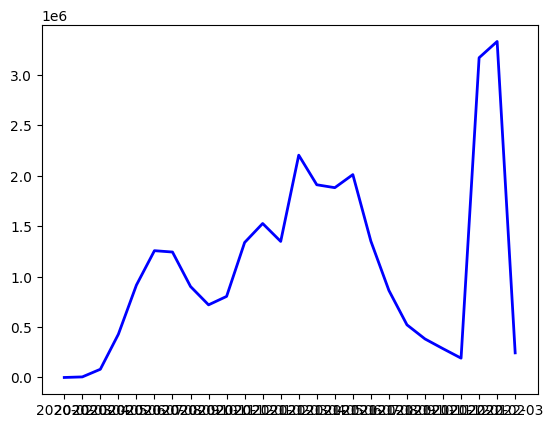

In [42]:
covid_by_month_in_brazil = covid_by_month[covid_by_month['location'].isin(['Brazil'])]

plot.plot(covid_by_month_in_brazil['year_month'], covid_by_month_in_brazil['new_cases'], 'b-', linewidth = 2 , label='Total Cases')

plot.show()